# Telegram archive analysis

Getting some insights from Telegram messages

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from datetime import datetime, date

This notebook requires that Telegram data be exported in JSON format.

In [2]:
filepath = 'result.json'
with open(filepath) as f:
    data = json.load(f)
messages = data['messages']

There are multiple message types in Telegram, each with different fields. To get a sample of what the message types look like, you can print a few.

In [3]:
messages[:5]

[{'id': 14742,
  'type': 'service',
  'date': '2023-10-01T20:04:28',
  'date_unixtime': '1696161868',
  'actor': 'Conrad',
  'actor_id': 'user12345',
  'action': 'create_group',
  'title': 'Test',
  'members': ['Conrad'],
  'text': '',
  'text_entities': []},
 {'id': 14743,
  'type': 'message',
  'date': '2023-10-01T20:04:34',
  'date_unixtime': '1696161874',
  'from': 'Conrad',
  'from_id': 'user12345',
  'text': 'testing',
  'text_entities': [{'type': 'plain', 'text': 'testing'}]},
 {'id': 14744,
  'type': 'message',
  'date': '2023-10-01T20:04:45',
  'date_unixtime': '1696161885',
  'from': 'Conrad',
  'from_id': 'user12345',
  'file': '(File not included. Change data exporting settings to download.)',
  'thumbnail': '(File not included. Change data exporting settings to download.)',
  'media_type': 'sticker',
  'sticker_emoji': '👋',
  'width': 512,
  'height': 512,
  'text': '',
  'text_entities': []},
 {'id': 14745,
  'type': 'message',
  'date': '2023-10-01T20:05:24',
  'date_uni

## Which members are most active?

To get the most active members, we get the author of each message in the archive, store them in a list, then create a `Counter` over the list.

In [4]:
authors = [message['from'] for message in messages if 'from' in message]
message_counts = Counter(authors)
message_counts

Counter({'Joe': 6, 'Conrad': 5})

## Chat activity over time

Each message also has a date field. We will parse this field and extract the day that the message was sent. Then we will feed the day to a `Counter` instance again, and plot the number of messages per day.

In [5]:
days = [datetime.fromisoformat(message['date']).strftime('%Y-%m-%d') for message in messages if 'from' in message]
day_counts = Counter(days)

df = pd.DataFrame.from_dict(day_counts, orient='index').reset_index()
df = df.rename(columns={'index': 'date', 0: 'count'})
df = df.set_index('date')

df

,count
date,
2023-10-01,6
2023-10-02,5


<Axes: xlabel='date'>

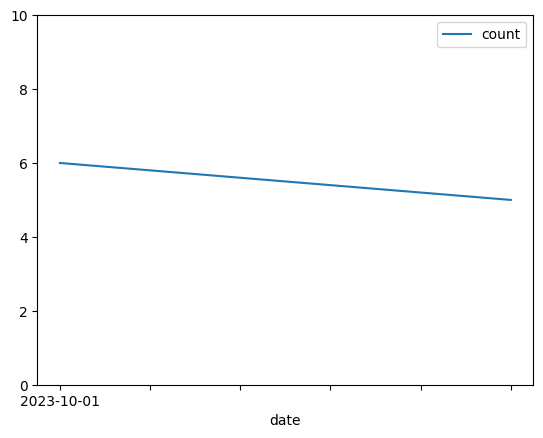

In [7]:
df.plot(ylim=(0, 10))